### Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
from matplotlib.pyplot import imread, imshow, figure, title

### Convolution Operation

In [2]:
def convolve(image, filter_):
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    i_height , i_width = gray_img.shape
    (f_height , f_width) = filter_.shape
    
    pad = (f_height - 1)//2
    gray_img = cv2.copyMakeBorder(gray_img, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    out = np.zeros((i_height, i_width), dtype="float32")
    
    for y in np.arange(pad, i_height+pad):
        for x in np.arange(pad, i_width+pad):
            slice_ = gray_img[y-pad:y+pad+1, x-pad:x+pad+1]
            conv = (slice_*filter_).sum()
            out[y-pad,x-pad] = conv
            
    out = rescale_intensity(out, in_range=(0,255))
    out = (out*255).astype("uint8")
    
    return out

### Read Input Image

In [3]:
cnt = 1
x_dim = 2
y_dim = 3
img = "../input/mickey_mouse.jpg"
image = imread(img)

### Box Blurr and Sharpen

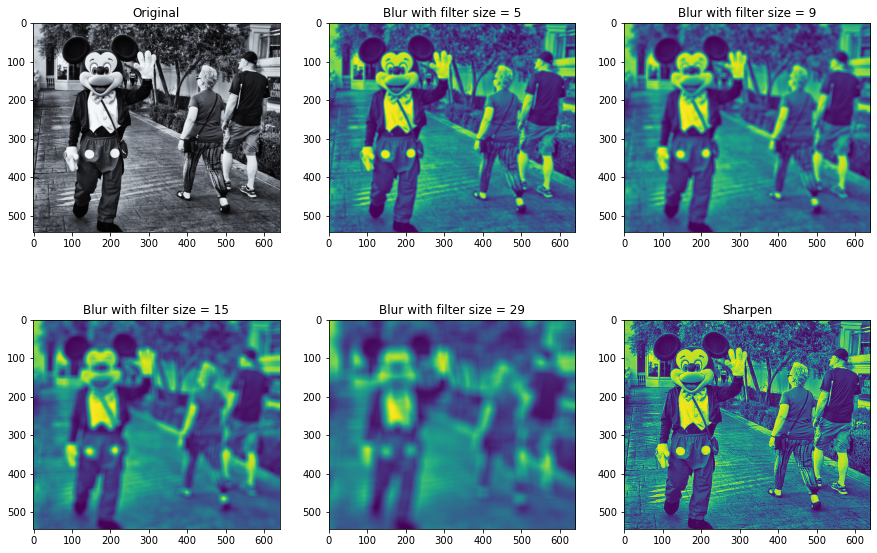

In [4]:
figure(figsize=[15,10])
plt.subplot(x_dim,y_dim,cnt)
title("Original")
imshow(image)
filter_sizes = [5, 9, 15, 29]
for n in filter_sizes:
    cnt+=1
    blur_filter = np.ones((n, n), dtype="float")*1.0/n**2
    plt.subplot(x_dim,y_dim,cnt)
    title("Blur with filter size = "+str(n))
    imshow(convolve(image, blur_filter))
cnt+=1
sharp_filter = np.array((
[0,-1,0],
[-1,5,-1],
[0,-1,0]), dtype="int")
plt.subplot(x_dim,y_dim,cnt)
title("Sharpen")
imshow(convolve(image, sharp_filter))